In [528]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt


In [529]:
stx = pd.read_csv('data/prices.csv')
stx.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [530]:

stx.keys()

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [531]:
stx.describe

<bound method NDFrame.describe of                        date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
...                     ...    ...         ...         ...         ...   
851259           2016-12-30    ZBH  103.309998  103.199997  102.849998   
851260           2016-12-30   ZION   43.070000   43.040001   42.689999   
851261           2016-12-30    ZTS   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00    AIV   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00    FTV   54.200001   53.630001   53.389999   

              high     volume  
0       126.250000  2163600.0  
1       125.5

## Get data by month with daily open and close numbers as well as difference.

Function takes in symbol of company, year and month

In [532]:
def get_data_by_month(symbol, year, month):
    sybl = stx.loc[stx["symbol"] == symbol]
    sybl["year"] = pd.DatetimeIndex(sybl["date"]).year
    sybl["month"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["month_two"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["day"] = pd.DatetimeIndex(sybl["date"]).day
    sybl["diff"] = sybl["open"]-sybl["close"]
    sybl = sybl.loc[sybl["year"] == year]
    sybl = sybl.loc[sybl["month"] == month]
    sybl_month = sybl[["month", "day", "open", "close", "diff"]].sort_values(by="day", ascending=True)

    return sybl_month

data_by_month = get_data_by_month('AAPL', 2015, 5)
data_by_month


,month,day,open,close,diff
640944,5,1,126.099998,128.949997,-2.849999
641438,5,4,129.500000,128.699997,0.800003
641932,5,5,128.149994,125.800003,2.349991
642426,5,6,126.559998,125.010002,1.549996
642920,5,7,124.769997,125.260002,-0.490005
643414,5,8,126.680000,127.620003,-0.940003
643908,5,11,127.389999,126.320000,1.069999
644402,5,12,125.599998,125.870003,-0.270005
644896,5,13,126.150002,126.010002,0.140000
645390,5,14,127.410004,128.949997,-1.539993


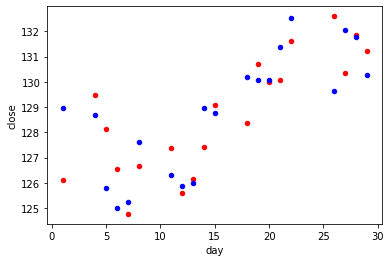

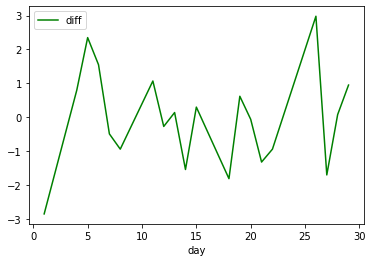

In [545]:
ax = plt.gca()
data_by_month.plot(kind='scatter',x='day',y='open',color='r', ax=ax)
data_by_month.plot(kind='scatter',x='day',y='close',color='b', ax=ax)
data_by_month.plot(kind='line',x='day',y='diff',color='green')
plt.show()

In [534]:
x = data_by_month["day"].values.reshape((-1,1))
y = data_by_month["diff"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
y_train

array([-0.059998,  1.069999,  2.980011,  0.800003, -1.539993, -1.319992,
        0.619995, -0.940003,  2.349991, -0.490005,  0.300003, -2.849999,
       -0.939987, -0.270005,  1.549996,  0.14    ])

Text(0.5, 1.0, 'What is the predicted lossed and gains by day for the following month?')

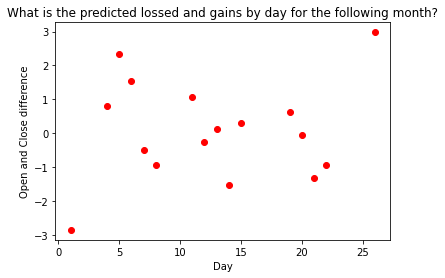

In [535]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Day')
plt.ylabel('Open and Close difference')
plt.title('What is the predicted lossed and gains by day for the following month?')

In [536]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")
?lm.score

Train accuracy 2.43 %
Test accuracy -73.95 %


Signature: lm.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_samples,)

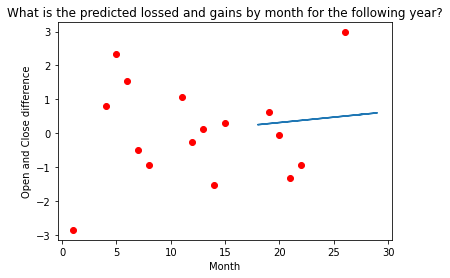

In [537]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Month')
plt.ylabel('Open and Close difference')
plt.title('What is the predicted lossed and gains by month for the following year?')
plt.show()

## Function gets the selected years by monthly avg for open and closing stocks and their difference.

Pass Stock symbol of company and year.

In [538]:

def get_data_by_year(symbol, year):
    sybl = stx.loc[stx["symbol"] == symbol]
    sybl["year"] = pd.DatetimeIndex(sybl["date"]).year
    sybl["month"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["idx"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["day"] = pd.DatetimeIndex(sybl["date"]).day
    sybl["diff"] = sybl["open"]-sybl["close"]
    sybl = sybl.loc[sybl["year"] == year]
    sybl_year = sybl[["idx", "month", "open", "close", "diff"]].groupby(["idx"]).mean()

    return sybl_year

data_by_year = get_data_by_year('AAPL', 2015)
data_by_year

,month,open,close,diff
idx,,,,
1,1,111.164000,110.641501,0.522499
2,2,125.023683,125.432105,-0.408422
3,3,126.466365,125.970908,0.495456
4,4,127.535239,127.291428,0.243811
5,5,128.707501,128.761500,-0.053999
6,6,128.013636,127.806817,0.206818
7,7,125.450455,125.335455,0.115000
8,8,113.439524,113.394762,0.044761
9,9,113.012381,112.797619,0.214762


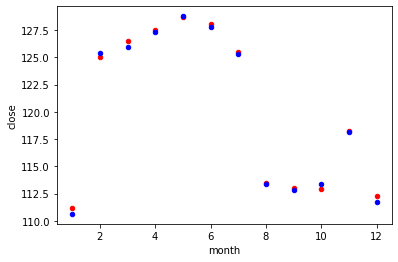

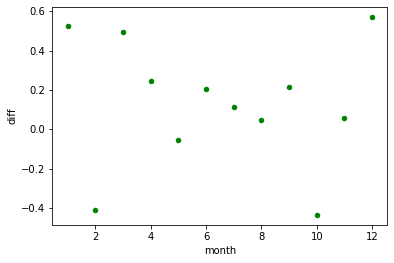

In [539]:
ax = plt.gca()
data_by_year.plot(kind='scatter',x='month',y='open',color='red', ax=ax)
data_by_year.plot(kind='scatter',x='month',y='close',color='blue', ax=ax)
data_by_year.plot(kind='scatter',x='month',y='diff',color='green')
plt.show()

In [540]:
x = data_by_year["month"].values.reshape((-1,1))
y = data_by_year["diff"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
y_train

array([ 0.20681836, -0.05399895,  0.49545614,  0.52249865,  0.0555    ,
        0.04476129,  0.24381114,  0.56909109,  0.21476219])

Text(0.5, 1.0, 'What is the predicted lossed and gains by month for the following year?')

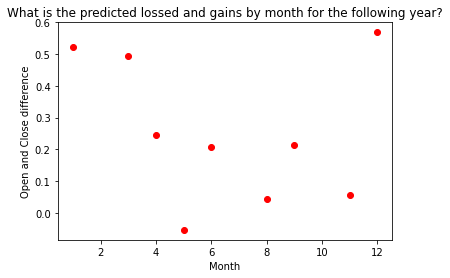

In [541]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Month')
plt.ylabel('Open and Close difference')
plt.title('What is the predicted lossed and gains by month for the following year?')

In [542]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")
?lm.score


Train accuracy 4.22 %
Test accuracy -397.21 %


Signature: lm.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_samples,)

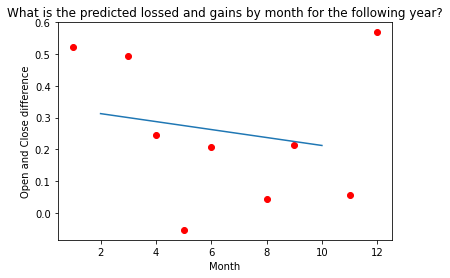

In [543]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Month')
plt.ylabel('Open and Close difference')
plt.title('What is the predicted lossed and gains by month for the following year?')
plt.show()